In [32]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#setting the color palette for all seaborn plots
sns.set_palette("tab10")
#setting the gridstyle for all seaborn plots
sns.set_style("whitegrid")

In [5]:
# loading the dataset
data = pd.read_csv(r"predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [9]:
data.shape

(10000, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [11]:
# checking for null values
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

There are no null values in the dataset

In [12]:
# checking for duplicates
data.duplicated().sum()

0

there are no duplicated values in the dataset

In [13]:
# dropping the unecessary columns
data.drop(['UDI','Product ID'], axis = 1, inplace = True)

In [14]:
data.sample()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
411,L,297.5,308.7,1429,44.3,201,0,No Failure


# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Type')

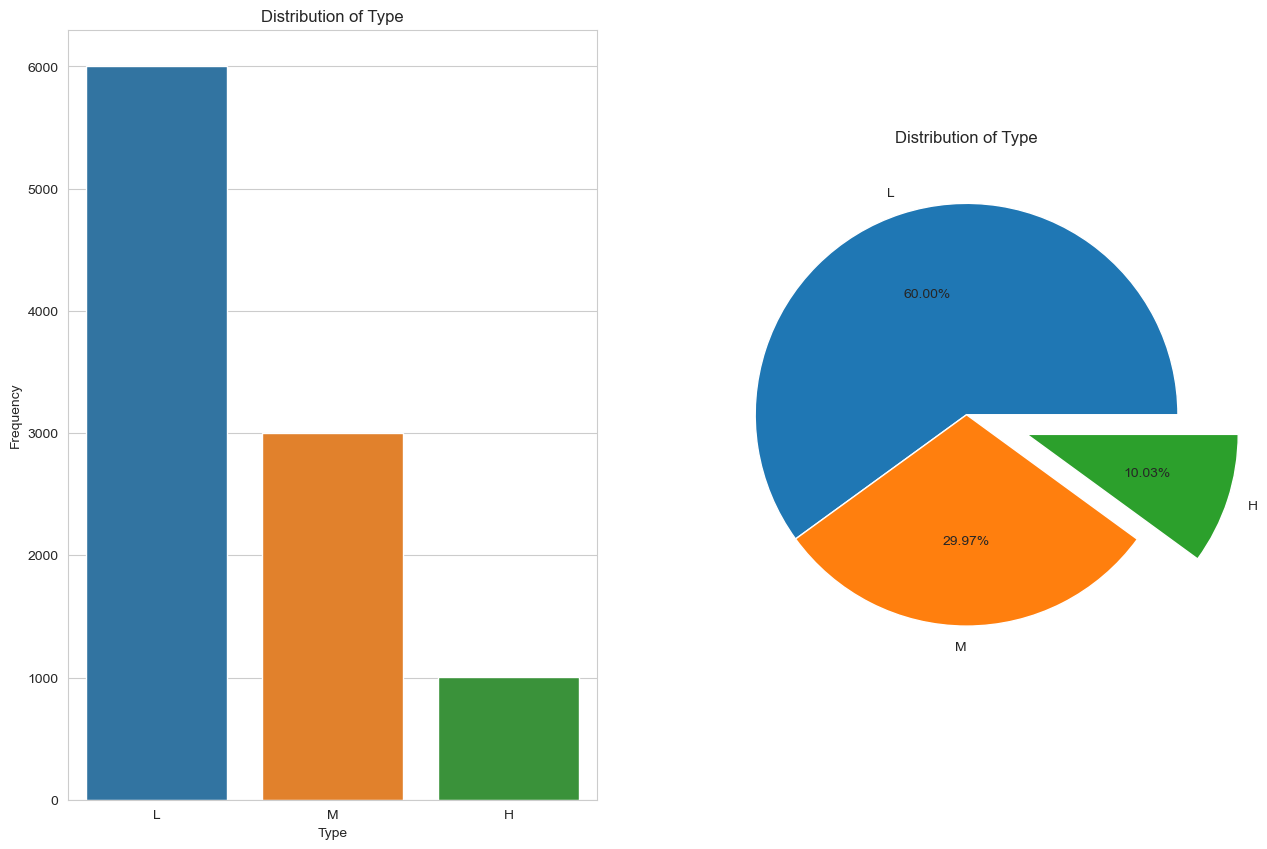

In [22]:
plt.subplots(1,2, figsize = (15,10))

plt.subplot(121)
sns.countplot(x = data.Type, order = ["L", "M", "H"] )
plt.title("Distribution of Type")
plt.xlabel("Type")
plt.ylabel("Frequency")

plt.subplot(122)
plt.pie(x = data.Type.value_counts().values, labels = data.Type.value_counts().index, autopct='%1.2f%%', explode=[0, 0, 0.3])
plt.title("Distribution of Type")

In [23]:
# numerical columns
data.select_dtypes(["float", "int"])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [25]:
# descriptive statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Distribution of Target')

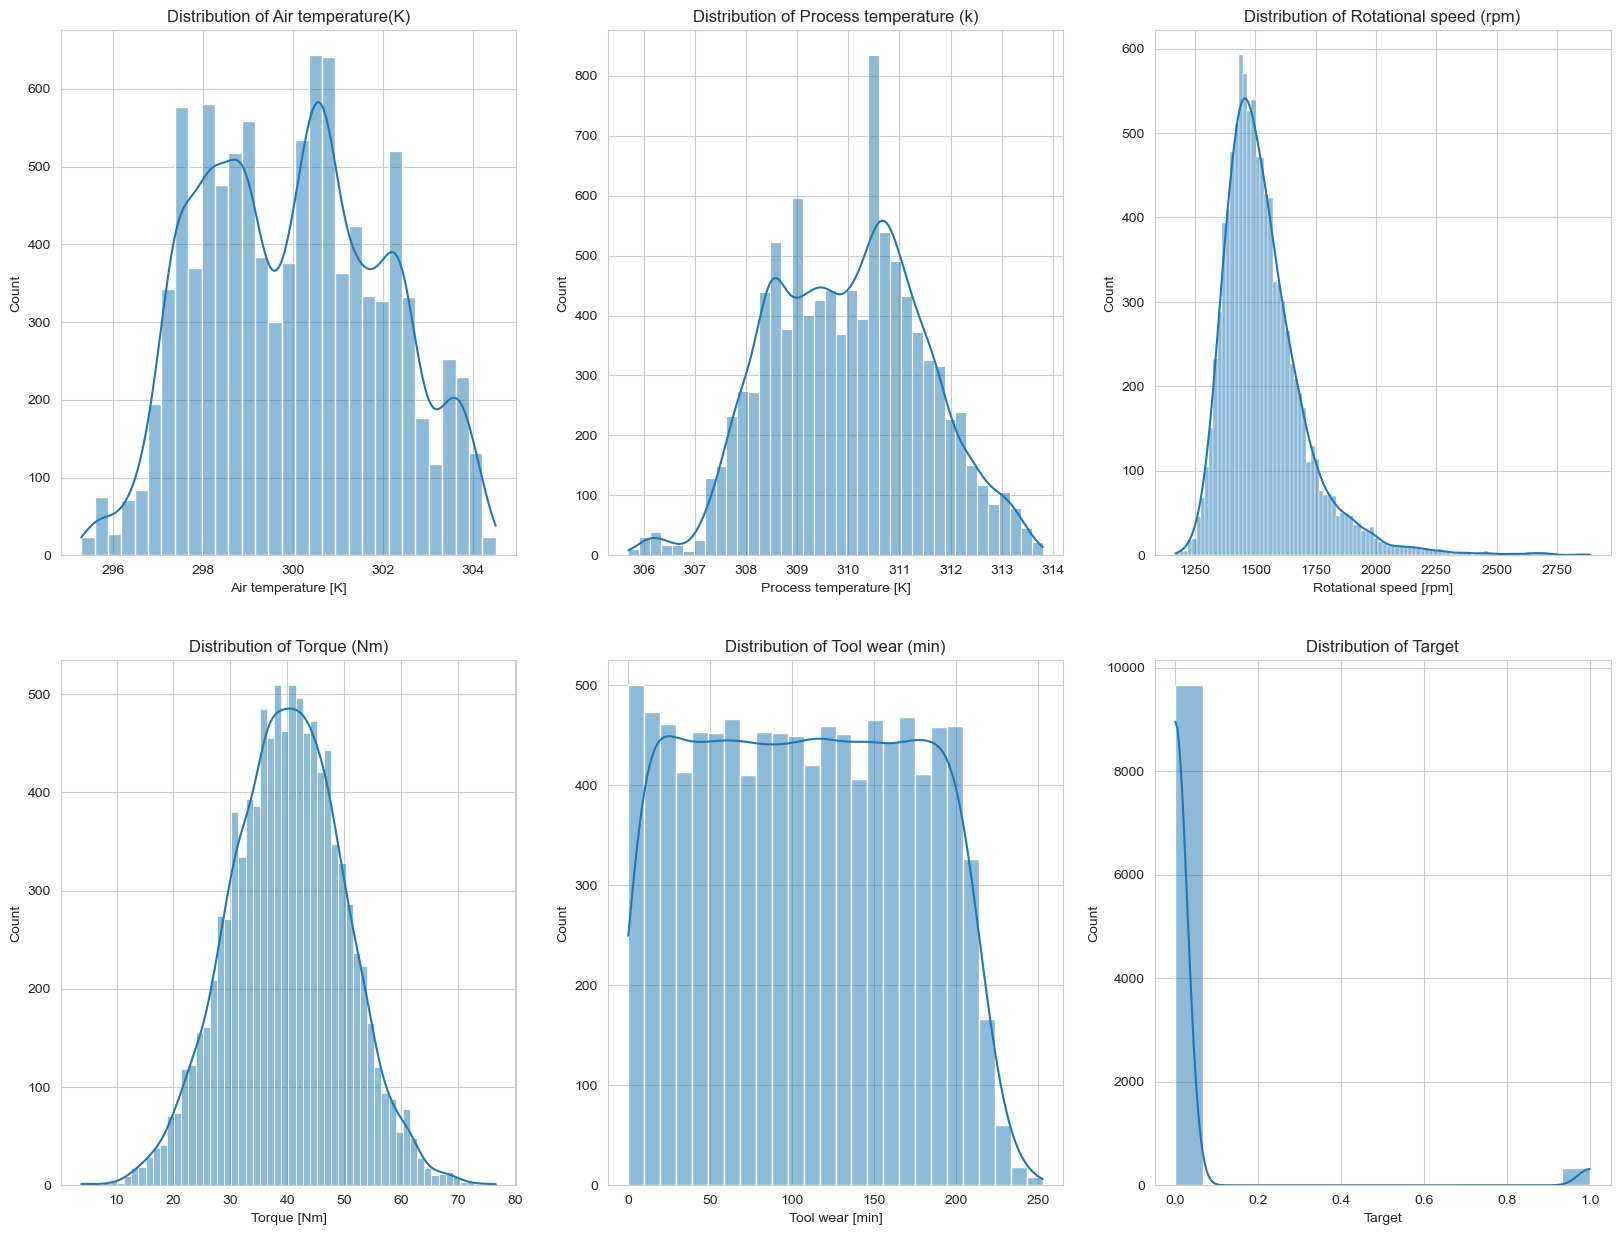

In [33]:
# checking the distribution of the numerical columns using histograms
plt.subplots(2,3, figsize=(20,15))

plt.subplot(231)
sns.histplot(data = data, x = "Air temperature [K]", kde = True)
plt.title("Distribution of Air temperature(K)")

plt.subplot(232)
sns.histplot(data=data, x = "Process temperature [K]", kde = True)
plt.title("Distribution of Process temperature (k)")

plt.subplot(233)
sns.histplot(data=data, x = "Rotational speed [rpm]", kde = True)
plt.title("Distribution of Rotational speed (rpm)")

plt.subplot(234)
sns.histplot(data = data, x = "Torque [Nm]", kde = True)
plt.title("Distribution of Torque (Nm)")

plt.subplot(235)
sns.histplot(data = data, x = "Tool wear [min]", kde = True)
plt.title("Distribution of Tool wear (min)")

plt.subplot(236)
sns.histplot(data = data, x = "Target", kde = True)
plt.title("Distribution of Target")

Text(0.5, 1.0, 'Distribution of Failure Type')

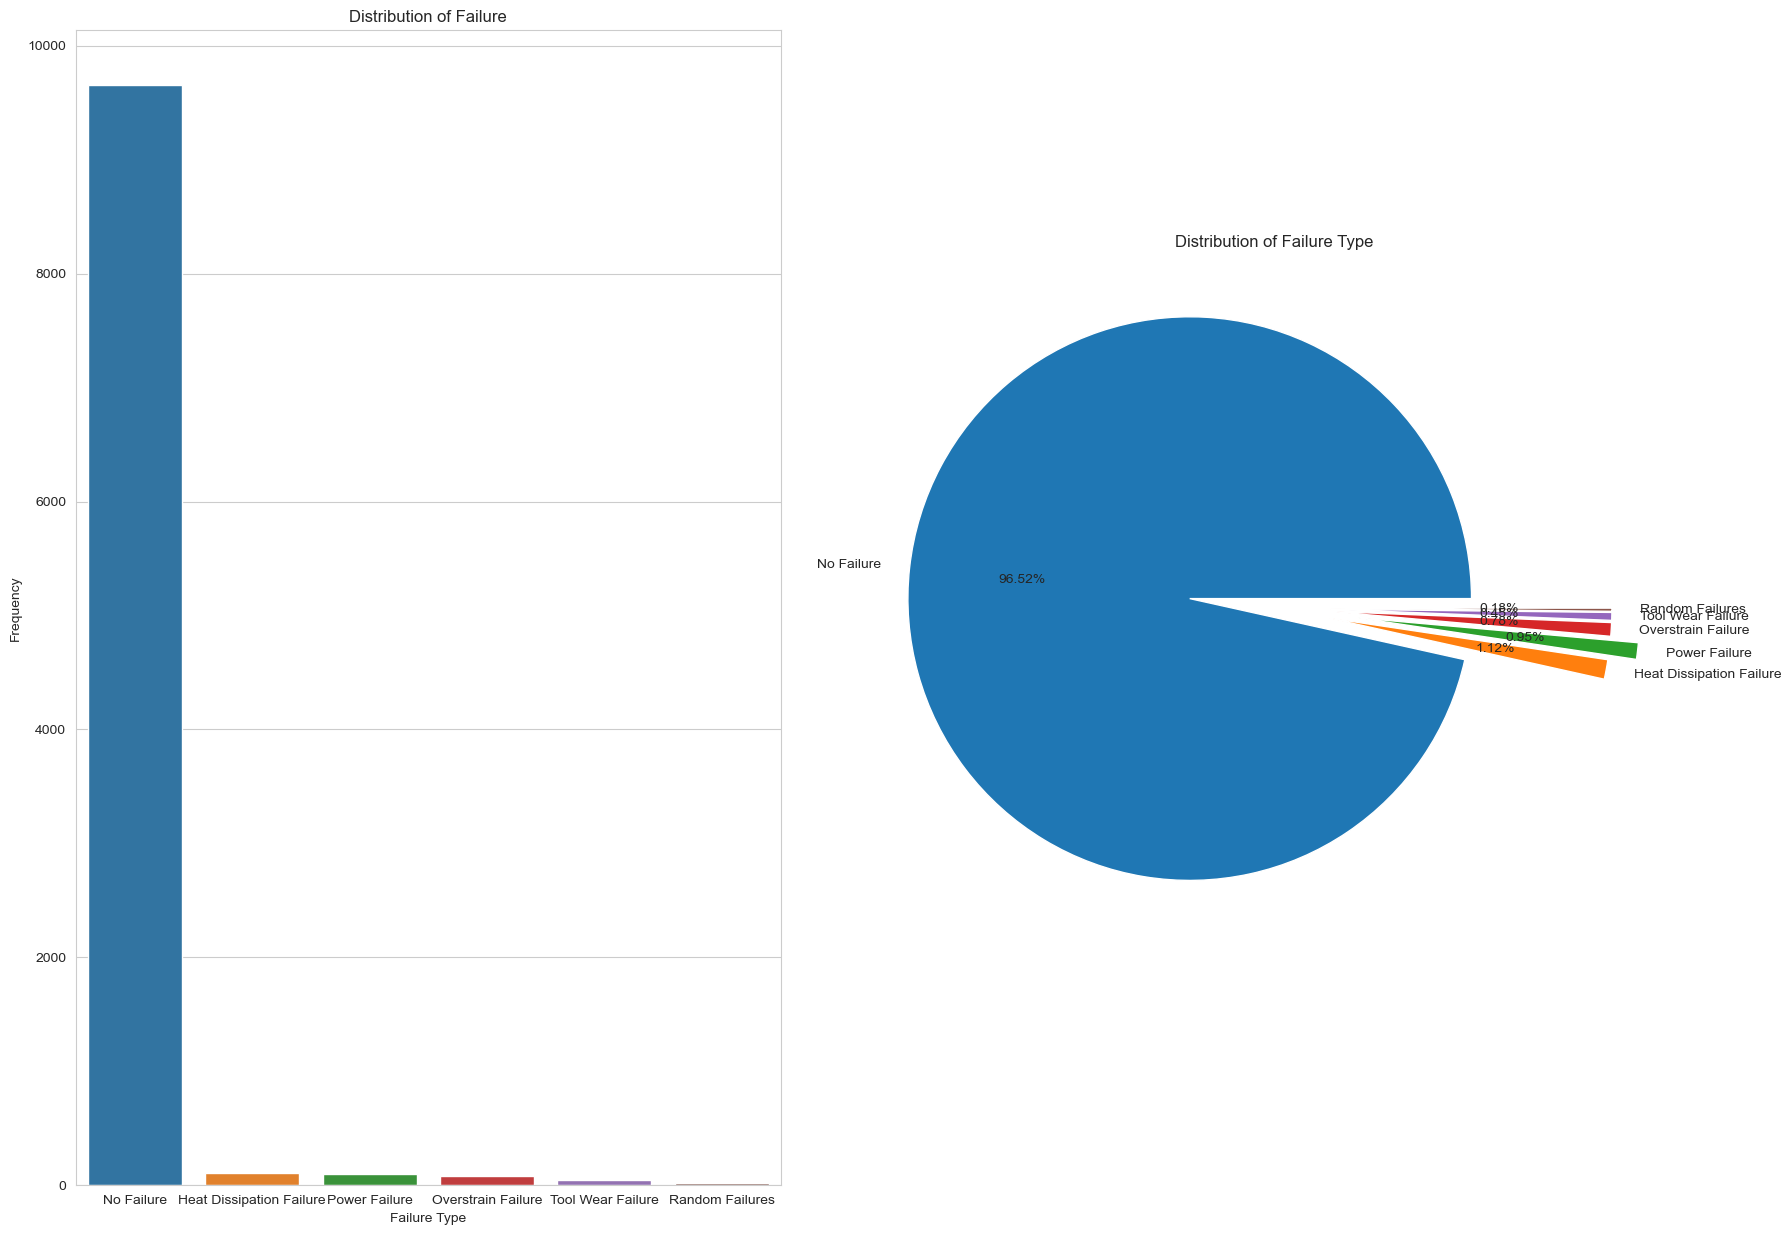

In [45]:
plt.subplots(1,2, figsize=(20,15))

plt.subplot(121)
sns.countplot(x='Failure Type', data=data, order=data['Failure Type'].value_counts().index)
plt.title("Distribution of Failure")
plt.ylabel("Frequency")

plt.subplot(122)
plt.pie(x = data['Failure Type'].value_counts().values, labels = data['Failure Type'].value_counts().index,  autopct='%1.2f%%', explode=[.3, 0.2, 0.3 ,.2 ,.2,0.2])
plt.title("Distribution of Failure Type")

Text(0.5, 1.0, 'Distribution of Target')

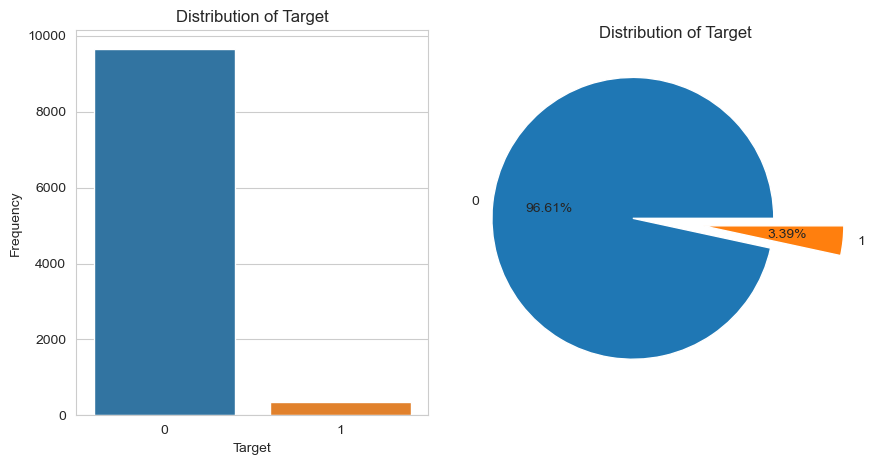

In [48]:
plt.subplots(1,2, figsize=(10,5))

plt.subplot(121)
sns.countplot(x='Target', data=data, order=data['Target'].value_counts().index)
plt.title("Distribution of Target")
plt.ylabel("Frequency")

plt.subplot(122)
plt.pie(x = data['Target'].value_counts().values, labels = data['Target'].value_counts().index,  autopct='%1.2f%%', explode=[.3, 0.2])
plt.title("Distribution of Target")

<Figure size 3000x2500 with 0 Axes>

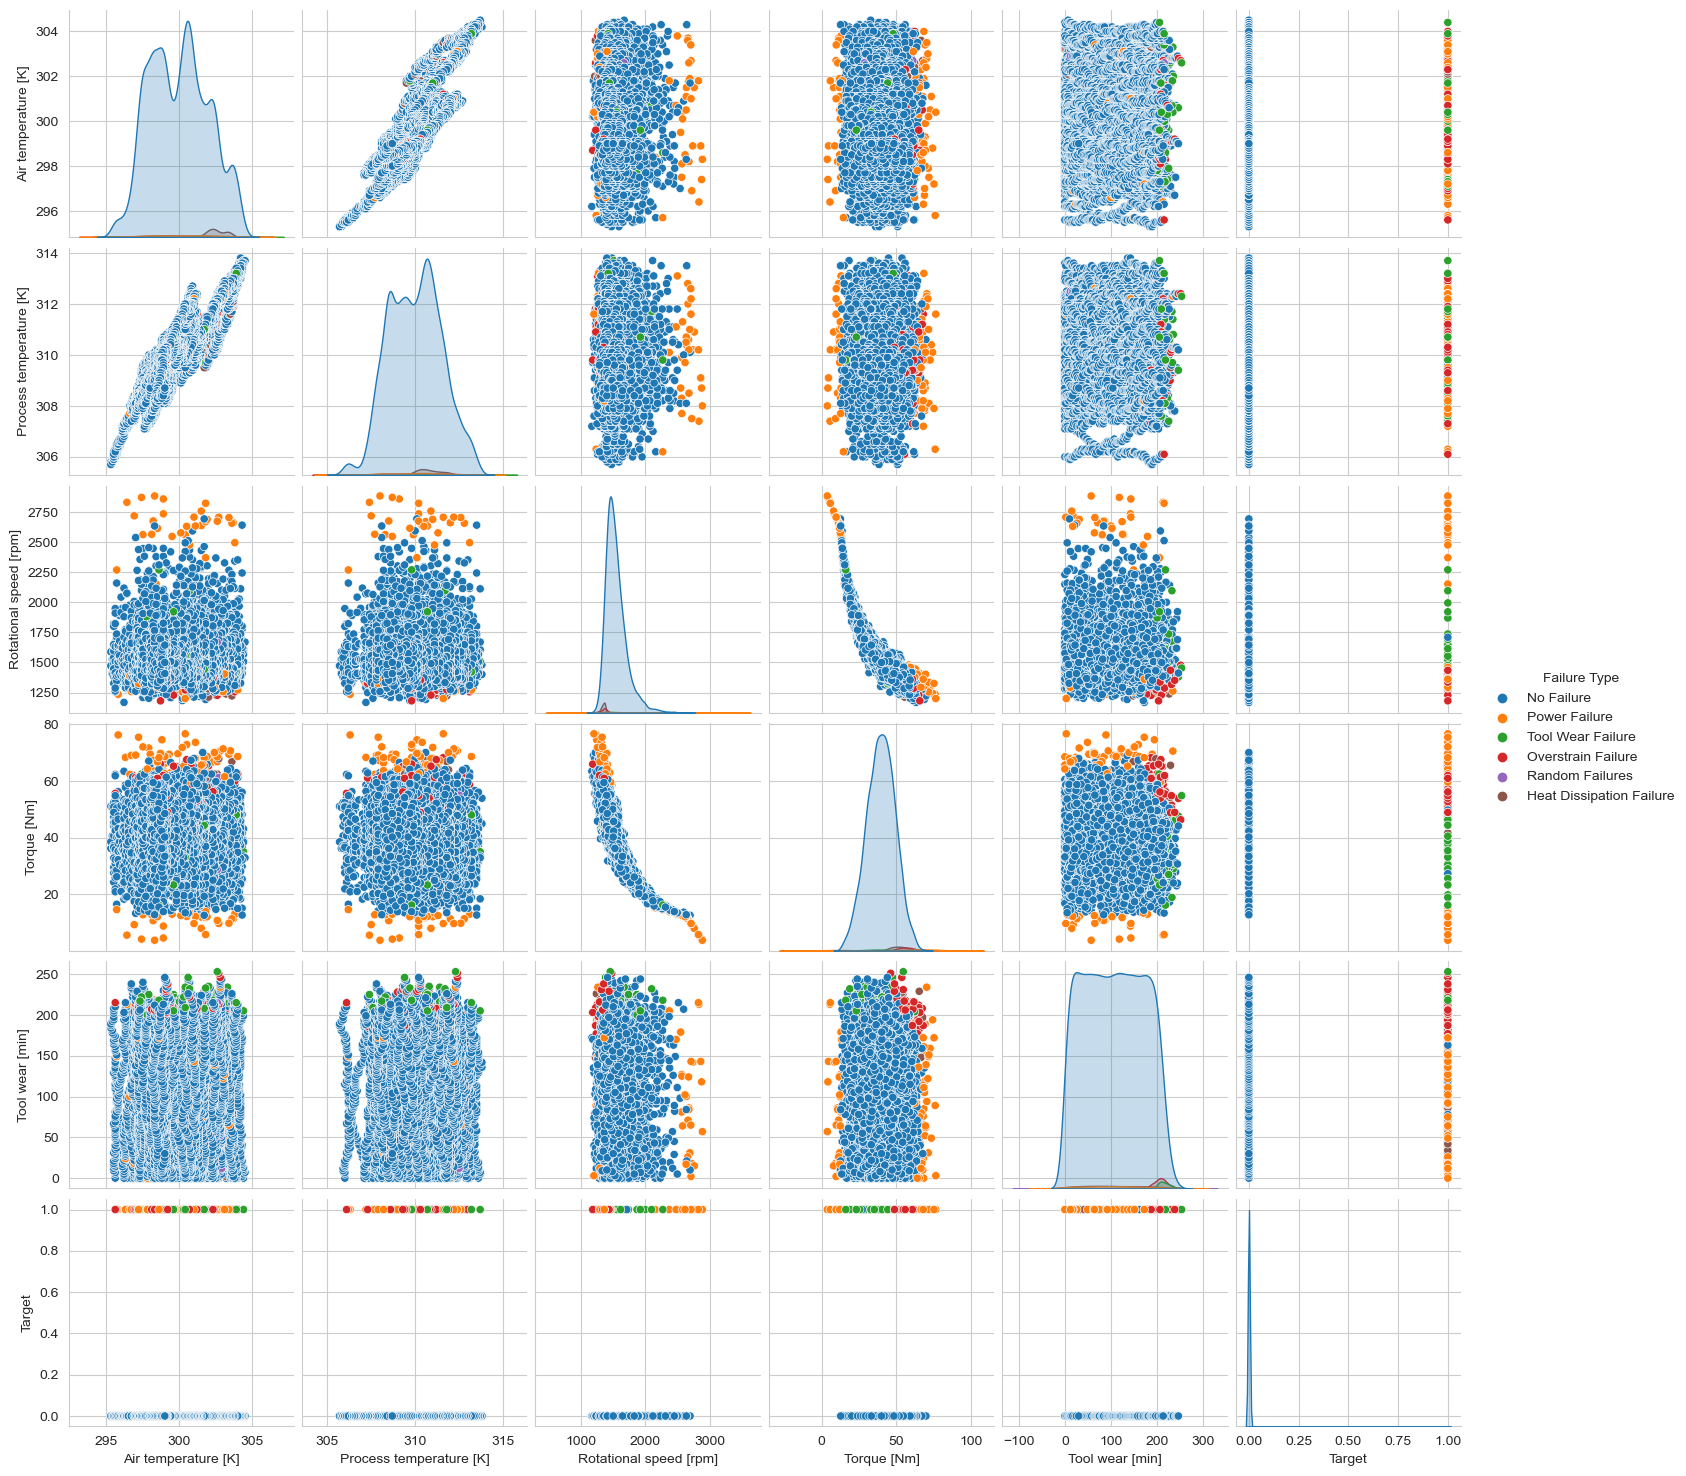

In [49]:
plt.figure(figsize=(30,25))
sns.pairplot(data=data,hue="Failure Type")

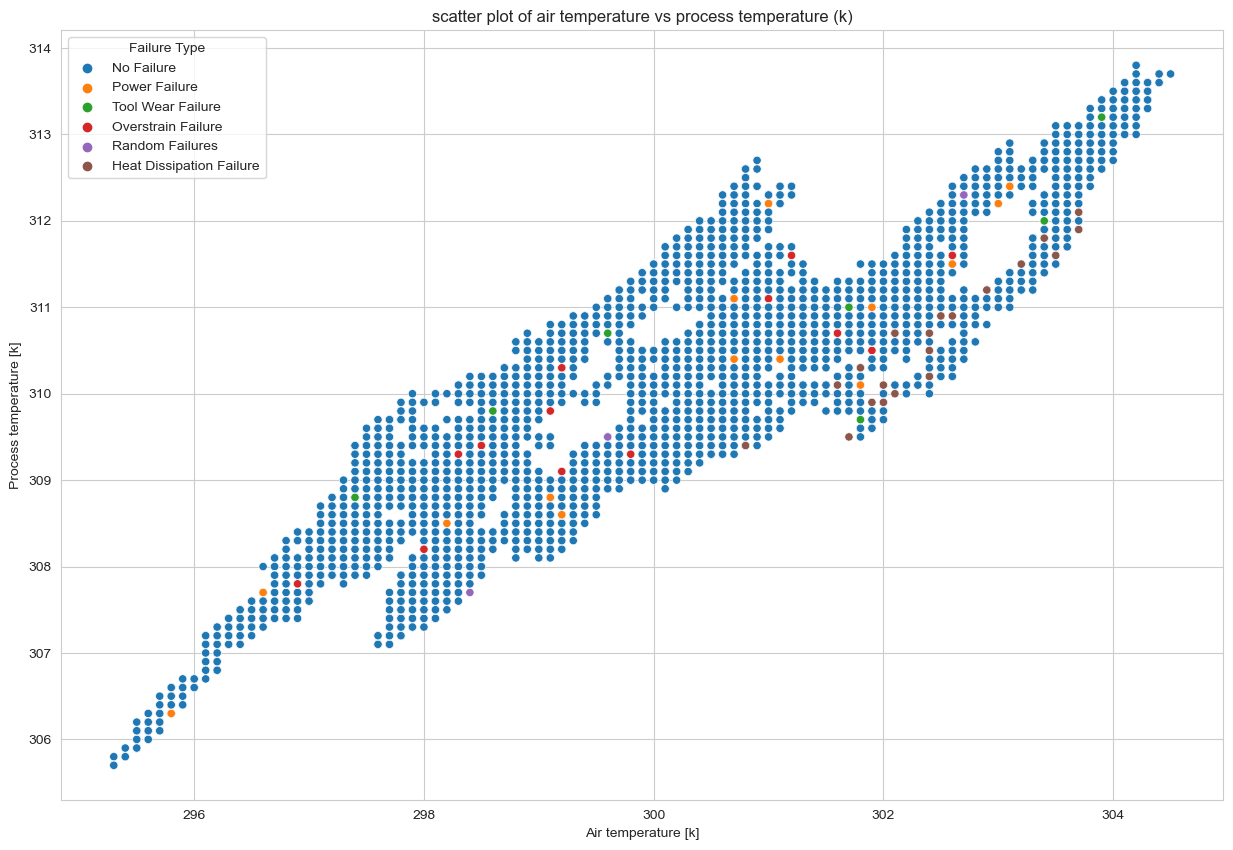

In [50]:
# air temperature vs process temperature hue failure type
plt.figure(figsize=(15,10))
sns.scatterplot(data = data, x = "Air temperature [K]", y = "Process temperature [K]", hue = "Failure Type")
plt.title("scatter plot of air temperature vs process temperature (k)")
plt.xlabel("Air temperature [k]")
plt.ylabel("Process temperature [k]")
plt.legend(title="Failure Type")

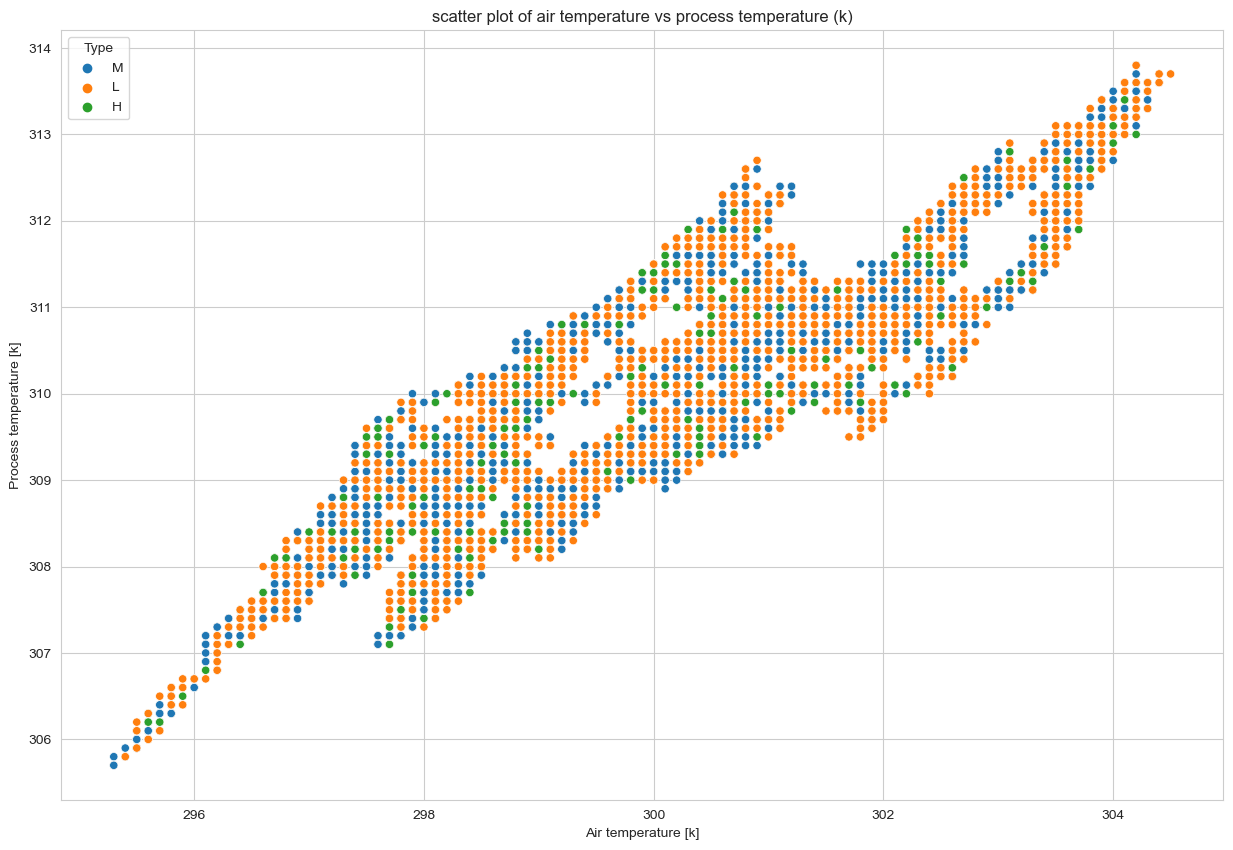

In [51]:
# air temperature vs process temperature hue type
plt.figure(figsize=(15,10))
sns.scatterplot(data = data, x = "Air temperature [K]", y = "Process temperature [K]", hue = "Type")
plt.title("scatter plot of air temperature vs process temperature (k)")
plt.xlabel("Air temperature [k]")
plt.ylabel("Process temperature [k]")
plt.legend(title="Type")

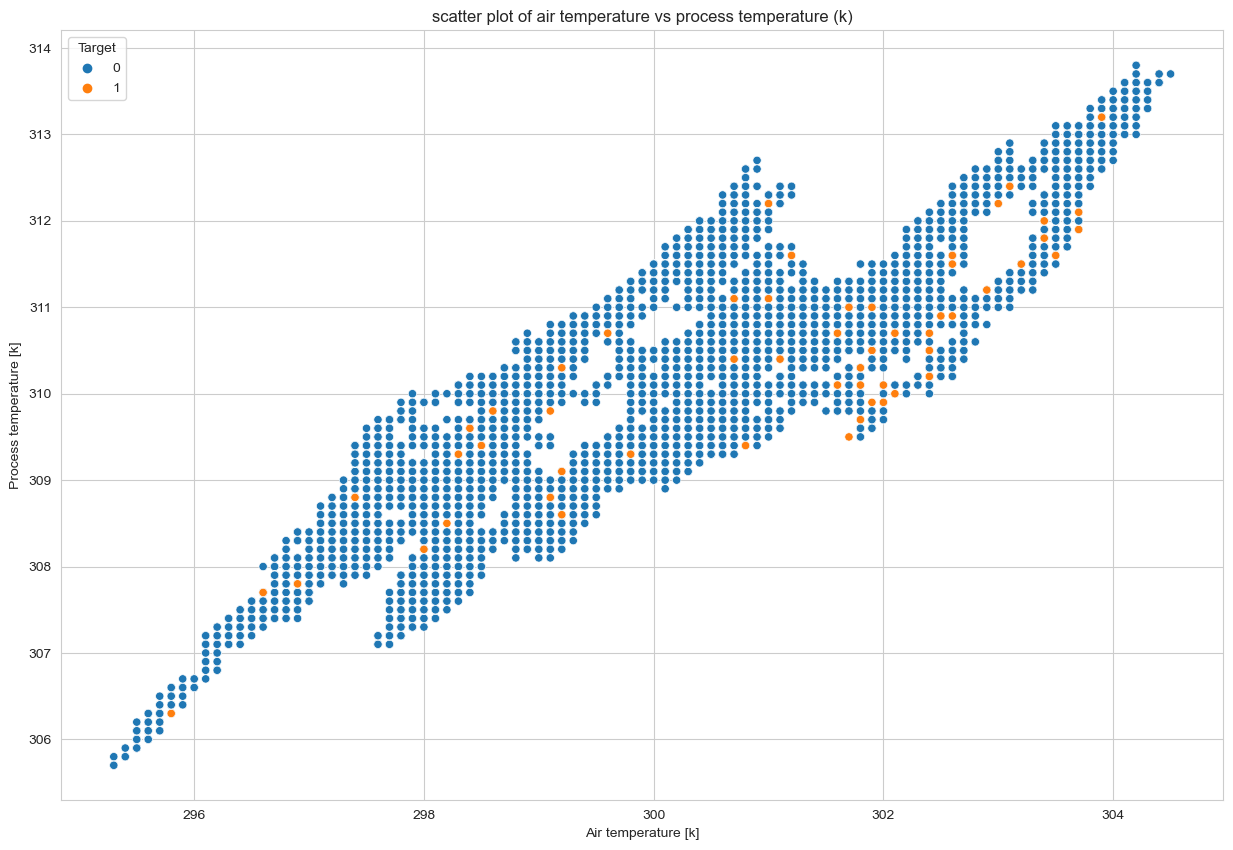

In [52]:
# air temperature vs process temperature hue target
plt.figure(figsize=(15,10))
sns.scatterplot(data = data, x = "Air temperature [K]", y = "Process temperature [K]", hue = "Target")
plt.title("scatter plot of air temperature vs process temperature (k)")
plt.xlabel("Air temperature [k]")
plt.ylabel("Process temperature [k]")
plt.legend(title="Target")

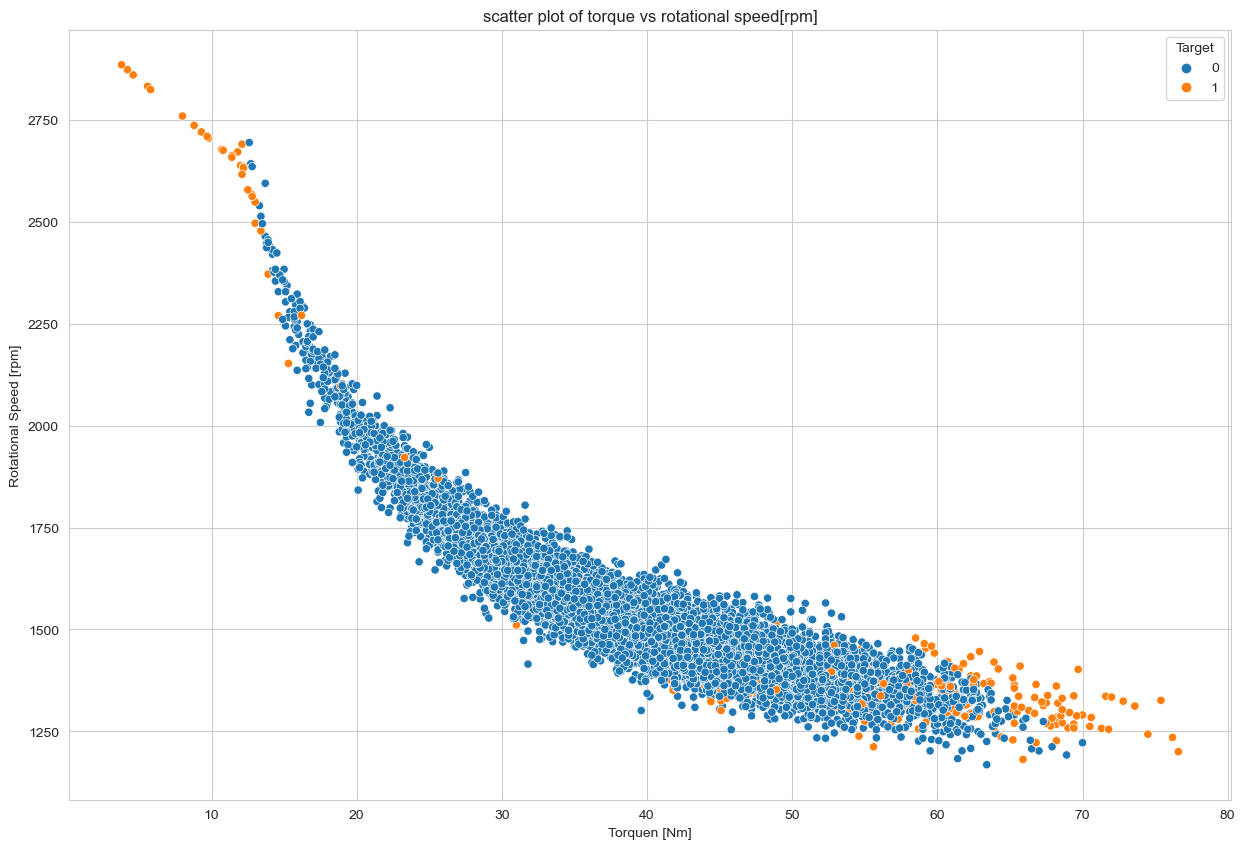

In [53]:
# relationship between torque and rotational speed with hue based on the Target variable
plt.figure(figsize=(15,10))
sns.scatterplot(data = data, x = "Torque [Nm]", y = "Rotational speed [rpm]", hue = "Target")
plt.title("scatter plot of torque vs rotational speed[rpm]")
plt.xlabel("Torquen [Nm]")
plt.ylabel("Rotational Speed [rpm]")
plt.legend(title="Target")

# Data preparation

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#fit and transform the type column
data['Type'] = le.fit_transform(data[['Type']])
# fit and transform the target column
data['Target'] = le.fit_transform(data[['Target']])

In [56]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,0,299.0,308.7,1408,48.5,25,0,No Failure


In [57]:
x = data.drop("Failure Type",axis=1)
y = data["Failure Type"].values

In [58]:
x = pd.get_dummies(x, drop_first=True)

# Extract the column names after creating dummy variables
col_name = x.columns

In [59]:
x =x.values

In [61]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [63]:
# fit transform on the target variable 
le.fit(y)

# Transform the target variable 'y' using the fitted label encoder
y = le.transform(y)

In [64]:
smk = SMOTE(random_state=42)

# Apply SMOTE to the feature set 'x' and target variable 'y' to resample them
X_res, y_res = smk.fit_resample(x, y)

# Convert the resampled target variable 'y_res' to a Pandas Series
y__ = pd.Series(y_res)

# Count the occurrences of each class in the resampled target variable
y__.value_counts()

1    9652
3    9652
5    9652
2    9652
4    9652
0    9652
Name: count, dtype: int64

In [65]:
X_res.shape,y_res.shape

((57912, 7), (57912,))

In [66]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
Resampled Dataset Shape Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [67]:
# Combine the resampled feature set 'X_res' and the resampled target variable 'y_res' into a single DataFrame
df_new = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [68]:
col_new=col_name
col_new=col_new.to_list()
col_new.append("Failure Type")
df_new.columns=col_new
df_new.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,1
1,1.0,298.2,308.7,1408.0,46.3,3.0,0.0,1
2,1.0,298.1,308.5,1498.0,49.4,5.0,0.0,1
3,1.0,298.2,308.6,1433.0,39.5,7.0,0.0,1
4,1.0,298.2,308.7,1408.0,40.0,9.0,0.0,1


In [69]:
x = df_new.drop('Failure Type', axis=1)
y = df_new['Failure Type']

In [70]:
x = pd.get_dummies(x,drop_first=True)

In [71]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)

# modeling

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #support vector machines
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score)

In [75]:
def select_model(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, stratify=y)
    models = [LogisticRegression(n_jobs=-1), SVC(kernel='rbf'), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]
    acc_train = []
    acc_test = []

    for model in models:
        #fitting
        model.fit(x_train,y_train)
        #prediction
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        #accuracy
        train_acc = round(model.score(x_train, y_train)*100,2)
        test_acc = round(model.score(x_test, y_test)*100,2)

        acc_train.append(train_acc)
        acc_test.append(test_acc)

    dic = {"Model" : models , 
           "Train_acc" : acc_train , 
           "Test_acc" : acc_test}
    return pd.DataFrame(dic)

In [76]:
training = select_model(x,y)

In [77]:
training

,Model,Train_acc,Test_acc
0,LogisticRegression(n_jobs=-1),89.56,89.48
1,SVC(),97.63,97.70
2,DecisionTreeClassifier(),100.00,99.56
3,"(DecisionTreeClassifier(max_features='sqrt', r...",100.00,99.85


# result

In [79]:
bestmodel= training["Model"][2]

acc :  0.999309332642666


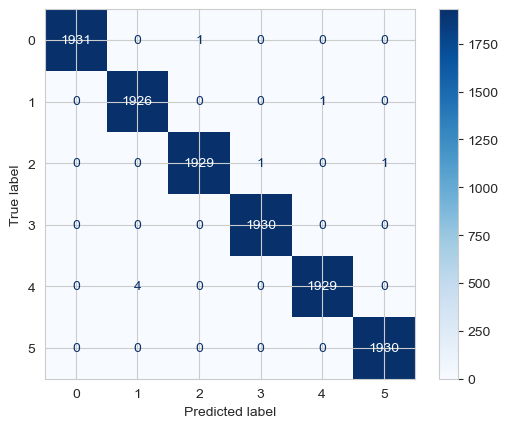

In [80]:
y_pred_test= bestmodel.predict(x_test)
cm = confusion_matrix(y_pred_test,y_test )

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


print("acc : " ,accuracy_score(y_pred_test,y_test))
disp.plot(cmap='Blues')

plt.show()

In [81]:
pd.DataFrame({"Actual" :y_test , "Predict" :y_pred_test})

,Actual,Predict
31073,3,3
46113,4,4
3920,1,1
42744,4,4
24768,2,2
...,...,...
24031,2,2
23512,2,2
32453,3,3
56745,5,5
